In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.shape

(1000, 2)

In [5]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [6]:
import nltk
import re

In [35]:
var = df.iloc[0,0]

In [36]:
var

'Wow... Loved this place.'

In [37]:
#make all reviews Lower -> python is case sensitive
#remove all punctuations -> , . like this
#remove stop words -> words which does not make contribute to review being bad or good
#bring back all words to their root form. i.e. lovely -> love

In [38]:
var = var.lower()

In [39]:
var

'wow... loved this place.'

In [40]:
var = re.sub('[^a-z0-9]+',' ', var)

In [41]:
var

'wow loved this place '

In [14]:
var1 = '....,,,,'
var1 = re.sub('[^a-z0-9]+',' ', var1)

In [15]:
var1

' '

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravip\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords

In [17]:
stop_words = stopwords.words('english')

In [18]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
var

'wow loved this place '

In [42]:
var_words = var.split()

In [43]:
var_words

['wow', 'loved', 'this', 'place']

In [30]:
from nltk.stem.porter import PorterStemmer

In [44]:
ps = PorterStemmer()

In [45]:
ps.stem('Loved')

'love'

In [46]:
result_words = [ps.stem(word) for word in var_words if word not in stop_words]

In [47]:
result_words

['wow', 'love', 'place']

In [48]:
var = ' '.join(result_words)

In [49]:
var

'wow love place'

In [50]:
l = []
for r in df['Review']:
    r = r.lower()
    r = re.sub('[^a-z0-9]+',' ', r)
    res_words = []
    res_words = [ps.stem(word) for word in r.split() if word not in stop_words]
    r = ' '.join(res_words)
    l.append(r)

In [51]:
l

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food 4 tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer 23 decent deal',
 'like final blow',
 'found plac

In [52]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [53]:
ps.stem('Overpriced')

'overpr'

In [54]:
ps.stem('WASTED')

'wast'

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
cv = CountVectorizer()

In [57]:
cv.fit_transform(l)

<1000x1585 sparse matrix of type '<class 'numpy.int64'>'
	with 5410 stored elements in Compressed Sparse Row format>

In [58]:
# to make output in array
X = cv.fit_transform(l).toarray()

In [59]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
X.shape

(1000, 1585)

In [61]:
y = df['Liked']

In [62]:
y.shape

(1000,)

In [63]:
type(X)

numpy.ndarray

In [64]:
type(y)

pandas.core.series.Series

In [65]:
#lets make y is also and array
y = np.array(y)

In [66]:
type(y)

numpy.ndarray

In [67]:
y.shape

(1000,)

In [71]:
#lets try Logistic Regression -
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

In [74]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 1585)
(700,)
(300, 1585)
(300,)


In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
LogReg = LogisticRegression()

In [77]:
LogReg.fit(X_train, y_train)

c:\programdata\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
y_pred = LogReg.predict(X_test)

In [79]:
y_pred.shape

(300,)

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
confusion_matrix(y_test, y_pred)

array([[118,  23],
       [ 45, 114]], dtype=int64)

In [82]:
(118+114)/300

0.7733333333333333

In [83]:
#Logistics Regression Accuracy - 0.7733333333333333

In [84]:
#lets try KNN -

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier(n_neighbors=5)

In [87]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [88]:
y_pred_knn = knn.predict(X_test)

In [89]:
y_pred_knn.shape

(300,)

In [90]:
confusion_matrix(y_pred_knn, y_test)

array([[117,  74],
       [ 24,  85]], dtype=int64)

In [91]:
(117+85)/300

0.6733333333333333

In [93]:
#lets find best value for KNN
l = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    err_rate = np.mean(y_pred != y_test)
    l.append(err_rate)   

In [94]:
l

[0.33666666666666667,
 0.37333333333333335,
 0.3566666666666667,
 0.37,
 0.32666666666666666,
 0.38333333333333336,
 0.38,
 0.4166666666666667,
 0.42,
 0.4266666666666667,
 0.4,
 0.3933333333333333,
 0.4033333333333333,
 0.42,
 0.42333333333333334,
 0.43666666666666665,
 0.4266666666666667,
 0.43333333333333335,
 0.4066666666666667,
 0.4166666666666667,
 0.42,
 0.42333333333333334,
 0.43666666666666665,
 0.44,
 0.42333333333333334,
 0.42333333333333334,
 0.43666666666666665,
 0.45,
 0.44333333333333336,
 0.46]

In [95]:
min(l)

0.32666666666666666

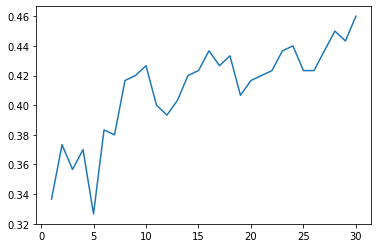

In [96]:
plt.plot(range(1,31), l)

In [97]:
#looks like value =5 brings best results
#KNN algo accuracy - 0.6733333333333333

In [98]:
#Lets try SVM now -
from sklearn.svm import SVC

In [99]:
svm = SVC()

In [100]:
svm.fit(X_train, y_train)

c:\programdata\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [101]:
y_pred_svm = svm.predict(X_test)

In [102]:
y_pred_svm.shape

(300,)

In [103]:
confusion_matrix(y_pred_svm, y_test)

array([[141, 159],
       [  0,   0]], dtype=int64)

In [104]:
141/300

0.47

In [106]:
#Here SVM is very bad model as it is biased to predict only 1 output

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
dt = DecisionTreeClassifier()

In [109]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [110]:
y_pred_dt = dt.predict(X_test)

In [111]:
y_pred_dt.shape

(300,)

In [112]:
confusion_matrix(y_pred_dt, y_test)

array([[122,  65],
       [ 19,  94]], dtype=int64)

In [113]:
(122+94)/300

0.72

In [114]:
#Decision Tree Algo has 0.72 accuracy

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
rf = RandomForestClassifier()

In [117]:
rf.fit(X_train, y_train)

c:\programdata\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [118]:
y_pred_rf = rf.predict(X_test)

In [119]:
y_pred_rf.shape

(300,)

In [120]:
confusion_matrix(y_pred_rf, y_test)

array([[122,  72],
       [ 19,  87]], dtype=int64)

In [121]:
(122+87)/300

0.6966666666666667

In [122]:
#using Random Forest we are getting 0.69 accuracy

In [127]:
#lets save X and y for direct load 
type(X)

numpy.ndarray

In [128]:
X_df = pd.DataFrame(X)

In [129]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
y_df = pd.DataFrame(y)

In [131]:
y_df.head()

,0
0,1
1,0
2,0
3,1
4,1


In [132]:
X_df.to_csv('X.csv')

In [133]:
y_df.to_csv('y.csv')